# Geodatenanalyse 1

## Tag 2 / Block 2 / Übung 5: Multivariate Statistik

In dieser Übung wollen wir uns mit der Analyse und Visualisierung von mehrdimensionalen Daten befassen. Lest dazu zunächst den vollständigeb Datensatz mit den Grundwasserparametern aus Karlsruhe in Python ein. 

In [7]:
# [1] hier Code eingeben
import pandas as pd
data = pd.read_csv('Data_GW_KA.csv', sep=';', encoding='cp1252')

### In 5 Schritten zur Hauptkomponentenanalyse

#### 1. Standardisierung

Da wir in der letzten Übung gesehen haben, dass die Varianzen und Kovarianzen der Parameter in dem Datensatz sehr unterschiedlich sind, sollten die Daten aller Parameter vor der weiteren Analyse an die Standard-Normalvereilung angepasst werden. Dazu gibt es in dem Python Package `sklearn` die Funktion `sklearn.preprocessing.StandardScaler().fit_transform()`. Die erste Klammer bleibt dabei leer, fügt den Namen Eures Datensatzes in der zweiten Klammer ein. 

Inspiziert anschließend den standardisierten Datensatz und überprüft ob die Daten wie gewünscht vorwiegend zwischen -1 und +1 liegen. 

In [8]:
# [2] hier Code eingeben
from sklearn.preprocessing import StandardScaler 
data_std = StandardScaler().fit_transform(data)

#### 2. Eigenwerte und Eigenvektoren bestimmen

Berechnet für die Bestimmung der Eigenwerte zuerst die Kovarianzmatrix mit Hilfe von `numpy` und der Funktion `numpy.cov(data.T)`. Wichtig ist hier das `.T` hinter dem Datensatz, das die transponierte Matrix von dem Datensatz bildet, das vereinfacht die weitere Handhabung der Matrizen. Anschließend könnt Ihr mit der Funktion `numpy.linalg.eig()` die Eigenwerte und Eigenvektoren der Kovarianzmatrix berechnen (2 Outputs definieren).

In [12]:
# [3] hier Code eingeben
import numpy
cov_std = numpy.cov(data_std.T)
eig_vals, eig_vecs = numpy.linalg.eig(cov_std)

#### 3. Hauptkomponenten bestimmen

Das Ziel der Hauptkomponentenanalyse ist es die Dimensionen des Datensatzes zu reduzieren, z.B. auf zwei für eine 2D-Visualisierung. Die Richtung dieser Achsen im Parameterraum entspricht den Eigenvektoren (mit Einheitslänge 1). Damit möglichst viel Information in Form der Varianz, in den zwei Dimensionen erhalten bleibt, suchen wir nun jene Eigenvektoren mit den größter Eigenwerten. 

Definiert dafür einen Parameter vom Typ `list` ohne Inhalt als `"[[]]*n"`, mit "n" als Dimension entsprechend der Anzahl der Eigenwerte. Dann füllt diese Liste über eine `for` Schleife mit den Absolutwerten der jeweiligen Eigenwerten und den Eigenvektoren (spaltenweise, also über einen einfachen Index, z.B. `"eigen[i]"`). 

Schlussendlich sortiert diese Liste noch in absteigender Reihenfolge: `data.sort()` gibt Euch die aufsteigende Reihenfolge, `data.reverse()` davon die umgekehrte Reihenfolge. Die zwei obersten Einträge entsprechen dann den gesuchten Hauptkomponenten entlang den größten Varianzen. 

Speichert diese zwei obersten Einträge in separaten Variablen vom Typ `list` ab, und lasst Euch diese anzeigen. 



In [11]:
# [4] hier Code eingeben
eig_pairs = [[]]*(len(eig_vals))
for i in range(len(eig_vals)):
    eig_pairs[i] = [(numpy.abs(eig_vals[i]), eig_vecs[:,i])]
eig_pairs.sort()
eig_pairs.reverse()
pc1 = eig_pairs[0]
pc2 = eig_pairs[1]

print(pc1, pc2)

[(2.9836238237533443, array([-0.2148891 , -0.36525401,  0.3106417 , -0.14084981, -0.35038887,
        0.04576564,  0.18700741, -0.06595438, -0.10616576,  0.12772047,
       -0.48594361, -0.26271961, -0.18711692, -0.32114993,  0.26265975]))] [(2.6993292050779947, array([-0.30597167,  0.0361922 ,  0.0774804 ,  0.16143611,  0.04838644,
        0.2683428 ,  0.35908707, -0.40609975, -0.4225409 ,  0.16050311,
       -0.09428273,  0.3677747 ,  0.00352115,  0.36541961, -0.15100853]))]


#### 4. Projektionsmatrix konstruieren

Mit Hilfe der Projektionsmatrix wollen wir die ursprünglichen Daten auf die zwei neuen Achsen der Hauptkomponenten transformieren. Um die 15 Parameter auf 2 Dimensionen zu reduzieren brauchen wir also eine (15 x 2) Matrix, deren Spalten den beiden Eigenvektoren mit den größten Eigenwerten entsprechen. 

Die Eigenvektoren habt Ihr bereits im letzten Schritt (zusammen mit den Eigenwerten) als `list` und nach Größe sortiert gespeichtert. Fügt die beiden obersten Vektoren nun mit Hilfe von `numpy.stack((Vektor1, Vektor2))` und dem Argument `axis=-1` für eine horiziontale Ausrichtung zu einer Matrix `W` zusammen. 

Als Erinnerung: Die Indizierung funktioniert hier mit dem Syntax `"list[Zeile][Spalte]"`. Schaut nochmal in dem Ausgabefenster oben nach, welche Zelle der Variablen Ihr benötigt.  

Lasst Euch anschließend "W" anzeigen.



In [8]:
# [5] hier Code eingeben
matrix_W = numpy.stack((pc1[0][1], pc2[0][1]), axis=-1)
print (matrix_W)

[[-0.2148891  -0.30597167]
 [-0.36525401  0.0361922 ]
 [ 0.3106417   0.0774804 ]
 [-0.14084981  0.16143611]
 [-0.35038887  0.04838644]
 [ 0.04576564  0.2683428 ]
 [ 0.18700741  0.35908707]
 [-0.06595438 -0.40609975]
 [-0.10616576 -0.4225409 ]
 [ 0.12772047  0.16050311]
 [-0.48594361 -0.09428273]
 [-0.26271961  0.3677747 ]
 [-0.18711692  0.00352115]
 [-0.32114993  0.36541961]
 [ 0.26265975 -0.15100853]]


#### 5. Projektion auf neue Ebenen und Visualisierung

Jetzt könnt Ihr über die Gleichung `Y = data x W ` die Transformation Eurer standardisierten Matrix von oben durchführen. Matrixmultiplikation in Python kann mit `matrix1.dot(matrix2)` durchgeführt werden. Die Output-Matrix Y sollte dann 39 x 2 (Datenpunkte x Hauptkomponenten) Dimensionen haben.  

In [9]:
# [6] hier Code eingeben
Y = data_std.dot(matrix_W)


Diese finale, transformierte Matrix können wir nun mit Hilfe von `pandas` in einem DataFrame umwandeln, das erleicntert das weitere Arbeiten damit. Gleichzeitig ergänzen wir in dem DataFrame eine Spalte mit dem Parameter "Flaechennutzung". 

Ergänzt nun in dem Skript unten mit Hilfe von `matplotlib` einen Scatterplot der Daten mit den beiden Hauptkomponenten als Achsen, und der Flaechennutzung als Farbe der Punkte. Was lässt sich anhand dieser Abbildung über die Parameterwerte in Bezug auf die Flaechennutzung sagen?   

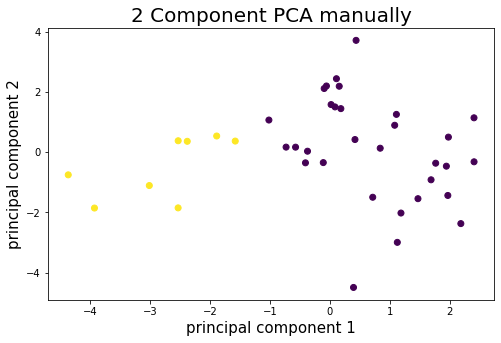

In [10]:
# [7] hier Code eingeben
# aus ndarray einen DataFrame mit zwei Spalten erzeugen 
principalDf = pd.DataFrame(data = Y , columns = ['principal component 1', 'principal component 2'])
# eine dritte Spalte mit den Werten der Flächennutzung ergänzen
finalDf = pd.concat([principalDf,pd.DataFrame(data,columns = ['Flaechennutzung'])], axis = 1) 

import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(8, 5))
ax = fig.add_subplot(1,1,1) 
ax.scatter(finalDf['principal component 1'], 
           finalDf['principal component 2'], 
           c = finalDf['Flaechennutzung']*30)
ax.set_xlabel('principal component 1', fontsize = 15) 
ax.set_ylabel('principal component 2', fontsize = 15)
ax.set_title('2 Component PCA manually', fontsize = 20) 
plt.show()



### Hauptkomponentenanalyse mit sklearn

Das Python Package `sklearn` enthält viele nützliche Funtkionen für statistische Analysen und maschinelles Lernen. Darunter auch eine Funktion für Hauptkomponentenanalyse `sklearn.decomposition.PCA()`. Definiert dafür zuerst ein Objekt das die genaue Methode beschreibt (z.B. als "model") mit Hilfe der Funktion `sklearn.decomposition.PCA()`. Definiert als Input wie viele Hauptkomponenten ("n_components=2") Ihr ausgegeben haben möchtet. 

Dann könnt Ihr den reduzierten Datensatz berechnen, indem Ihr auf diese Methode das Attribut `.fit_transform()` anwendet, mit dem ursprünglichen Datensatz als Input. 


In [13]:
# [8] hier Code eingeben
from sklearn.decomposition import PCA
model = PCA(n_components=2)
data_reduced = model.fit_transform(data_std)

Für die Bewertung der Aussagekraft einer Hauptkomponentenanalyse ist es wichtig zu wissen, wie viel der ursprünglich Varianz (und damit der Informationen) in dem neuen transformierten Datensatz enthalten ist. Für die einzelnen Komponenten könnt Ihr das ausrechnen, indem Ihr das Attribut `.explained_variance_ratio_` auf Euer PCA Objekt anwendet. Berechnet außerdem die Summe der Varianzen. 

Wie würdet Ihr die Werte einordnen und die Aussagekraft bewerten?

In [14]:
# [9] hier Code eingeben
var_exp = model.explained_variance_ratio_
var_tot = sum(model.explained_variance_ratio_)
print (var_exp)
print(var_tot)

[0.19380804 0.17534104]
0.36914908563348825


Nun stellt auch die Ergebnisse der PCA mit `sklearn` analog zu oben graphisch dar, und vergleicht die beiden Ergebnisse.

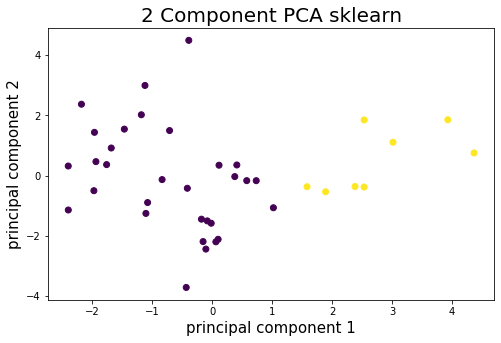

In [15]:
# [10] hier Code eingeben
principalDf2 = pd.DataFrame(data = data_reduced, columns = ['principal component 1', 'principal component 2'])
finalDf2 = pd.concat([principalDf2,pd.DataFrame(data,columns = ['Flaechennutzung'])], axis = 1) 

fig = plt.figure(1, figsize=(8, 5))
ax = fig.add_subplot(1,1,1) 
ax.scatter(finalDf2['principal component 1'], 
           finalDf2['principal component 2'], 
           c = finalDf2['Flaechennutzung']*30)
ax.set_xlabel('principal component 1', fontsize = 15) 
ax.set_ylabel('principal component 2', fontsize = 15)
ax.set_title('2 Component PCA sklearn', fontsize = 20) 
plt.show()

Wenn Ihr alles richtig gemacht habt, sollten die beiden Abbildung das gleiche Bild zeigen (u.U. gespiegelt oder rotiert, also mit einem Vorzeichenwechsel auf einer oder beiden Achsen). 

### Clusteranalyse mit sklearn.KMeans

Führt nun zum Abschluss noch eine Clusteranalyse mit dem k-Means Algorithmus und `sklearn.cluster.KMeans()` durch. Definiert dafür (analog zur PCA oben) zuerst wieder ein Objekt mit der Methode für 2 Cluster ("n_clusters=2"), und dann passt Eure Daten daran an (`model.fit(data)`). Die Zuordnung Eurer Daten in die Cluster könnt Ihr Euch über `model.predict(data)` als Vektor anzeigen lassen.

In [16]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(data_std)
yhat = model.predict(data_std)

Fügt nun diesen Vektor mit der Clusterzuordnung zu Eurem ursprünglichen Datensatz hinzu, in dem Ihr ihn zuerst in einem pandas DataFrame umwandelt und dann mit den Datensatz zusammenführt (analog zu oben). Visualiert anschließend  die Ergebnisse in einem Scatterplot (über zwei beliebige Parameter des Datensatzes), und färbt die Punkte anhand der Clusterzuordnung ein. 

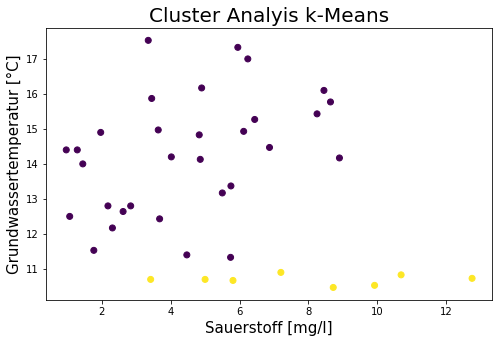

In [17]:
# neuen pandas DataFrame erzeugen
cluster = pd.DataFrame(data = yhat, columns =['cluster'])
# Daten und Cluster-Vektor zusammenbringen
data_clus = pd.concat([data, cluster], axis = 1)

fig = plt.figure(2, figsize=(8, 5))
ax = fig.add_subplot(1,1,1) 
ax.scatter(data_clus['Sauerstoff_mg/l'], 
           data_clus['GW_Temperatur_°C'], 
           c = data_clus['Flaechennutzung'])
ax.set_xlabel('Sauerstoff [mg/l]', fontsize = 15) 
ax.set_ylabel('Grundwassertemperatur [°C]', fontsize = 15)
ax.set_title('Cluster Analyis k-Means', fontsize = 20) 
plt.show()

Vergleicht abschließend noch die Ergebnisse der PCA und Clusteranalyse. Was fällt dabei auf?

## Ende

### Referenzen: 

Koch et al. (2020), Groundwater fauna in an urban area: natural or affected? https://hess.copernicus.org/preprints/hess-2020-151/hess-2020-151.pdf

Lever et al. (2017) Principal component analysis, Nature Methods 14(7), 641-642

https://towardsdatascience.com/a-complete-guide-to-principal-component-analysis-pca-in-machine-learning-664f34fc3e5a
